In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import sys
#sys.path.insert(0,'../source/')

In [2]:
from kftneutrinos import py_first_order
# from kftneutrinos import py_second_order
# from kftneutrinos import py_born

In [3]:
# The textwidth should be that of your TeX document, in pts (points).
# To get it, place
#   \showthe\textwidth
# inside your TeX document, recompile and search the logs.
# To grab it directly, compile your document using
#   pdflatex -interaction=nonstopmode document.tex | grep '>.*pt\.'
height = 2
fontsize = 11/1.2
cm = 1/2.54  # centimeters in inches
width = 8.6*cm # PRL figure width

latex_preamble = r'''
    \usepackage{lmodern}
    \usepackage{amsmath}
    \usepackage{amsfonts}
    \usepackage{mathtools}
    \usepackage{siunitx}
'''
matplotlib.rcParams.update({
    'text.usetex'        : True,
    'font.family'        : 'serif',
    'font.serif'         : 'cmr10',
    'font.size'          : fontsize,
    'mathtext.fontset'   : 'cm',
    'text.latex.preamble': latex_preamble,
})
Hubbles_to_Gyr = 0.001022

**-------Input-------**

In [4]:
x_here = np.array([0.0, 0.0, 8.0])
z_ini = 3.0
Tnu = 0.0001676375864435959

masses = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]


Gauss_Laguerre = 80
rtols = np.array([1e-7, 1e-5, 1e-5])
atols = np.array([1e-35, 1e-35, 1e-35])

In [5]:
int_free_analytical = 4*np.pi*1.803*Tnu**3
print(f"The analytical free integral is {int_free_analytical:.12}.")

The analytical free integral is 1.06738178968e-10.


In [6]:
first = []
tic = time()
for mass in masses:
    val = py_first_order(mass, z_ini, rtols, atols, x_here[2], Gauss_Laguerre, Tnu)
    first.append(val)
toc = time()
print(f"Computed {len(masses)} 1PT values in {toc - tic:.5} seconds.")
first = np.array(first)/int_free_analytical

Computed 10 1PT values in 0.42353 seconds.


## Plots

In [7]:
mertsch = {}
mertsch_data_labels = ['nfw', 'nfw_baryons', 'nfw_baryons_virgo', 'nfw_baryons_virgo_andromeda']
for label in mertsch_data_labels:
    mertsch[label] = np.genfromtxt('../data/mertsch_'+label+'.txt', delimiter=', ')

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_76669/3244012353.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[10, 6])


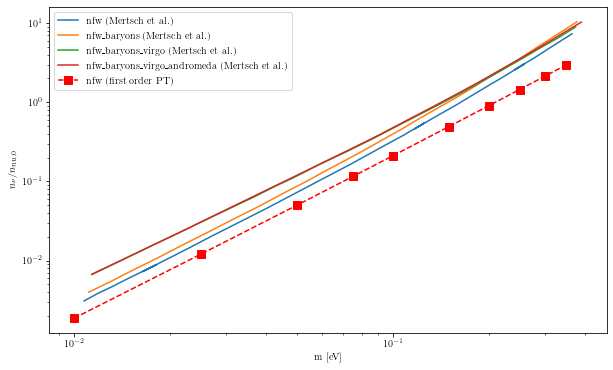

In [8]:
masses = np.array(masses)

fig, ax = plt.subplots(1, 1, figsize=[10, 6])
for label, data in mertsch.items():
    ax.plot(data[:, 0]*1e-3, data[:, 1], '-', label=f"{label} (Mertsch et al.)")
ax.plot(masses, first, 'rs--', markersize=8, label='nfw (first order PT)')

ax.set(xlabel='m [eV]', ylabel=r'$n_\nu / n_{nu,0}$', xscale='log', yscale='log')
#ax.axvline(x=0.06, label='minimum mass')
ax.legend(frameon=True)
fig.savefig('mass_Rs_divby5.pdf')